In [1]:
import pandas as pd
import numpy as np
from function import interpolate_IncreasePoints, vectorized_LowerBond, vectorized_UperBond
IV_data = pd.read_csv('./../../Data/Organized/IV/NearbyMonth.csv', index_col=False, encoding='Big5')

column_names = ['交易日期', '履約價', '隱含波動率(收盤價)', '買賣權']
column_index = [IV_data.columns.get_loc(col) for col in column_names]


IV_matrix  = np.array(IV_data)


rows = np.arange(len(IV_matrix))

opt_types = ['call', 'put']
variable_columns_names  = ['期貨收盤價', '履約價', '買賣權', '收盤價', '無風險利率', '到期天數']
variable_columns_index = [IV_data.columns.get_loc(col) for col in variable_columns_names]
for opt_type in opt_types:
    rows_type = rows[np.equal(IV_matrix[:, column_index[3]], opt_type)]
    IV_matrix_type = IV_matrix[rows_type]

    iv_col_type = IV_matrix_type[:, column_index[2]].astype(float)
    F0 = np.array(IV_matrix_type[:, variable_columns_index[0]])
    K = np.array(IV_matrix_type[:, variable_columns_index[1]])
    c_p = np.array(IV_matrix_type[:, variable_columns_index[2]])
    price = np.array(IV_matrix_type[:, variable_columns_index[3]])
    r = np.array(IV_matrix_type[:, variable_columns_index[4]])

    T = np.array(IV_matrix_type[:, variable_columns_index[5]]) / 365
    #理論價格上下界
    priceUper = vectorized_UperBond(c_p, F0, K, r, T)
    priceLower = vectorized_LowerBond(c_p, F0, K, r, T)
    correct = (price < priceUper) & (price > priceLower)
    wrong = np.bitwise_not(correct)
    rows_type_wrong = rows_type[wrong]
 
    dates = IV_matrix_type[:, column_index[0]]
    dates = dates[wrong]
    dates = np.unique(dates)

    new_iv_idx = 0
    for date in dates:
        rows_type_day = rows_type[np.equal(IV_matrix_type[:, column_index[0]], date)]
        oneday_type = IV_matrix[rows_type_day]

        iv_day_type = oneday_type[:, column_index[2]].astype(float)
        F0 = np.array(oneday_type[:, variable_columns_index[0]])
        K = np.array(oneday_type[:, variable_columns_index[1]])
        c_p = np.array(oneday_type[:, variable_columns_index[2]])
        price = np.array(oneday_type[:, variable_columns_index[3]])
        r = np.array(oneday_type[:, variable_columns_index[4]])

        T = np.array(oneday_type[:, variable_columns_index[5]]) / 365
        #理論價格上下界
        priceUper = vectorized_UperBond(c_p, F0, K, r, T)
        priceLower = vectorized_LowerBond(c_p, F0, K, r, T)
        correct = (price < priceUper) & (price > priceLower)
        wrong = np.bitwise_not(correct)
        i = 0
        while wrong[i]:
            i = i+1
        j = len(wrong)-1
        while wrong[j]:
            j = j-1
        rows_type_day = rows_type_day[i:j+1]
     

        oneday_correct_type = oneday_type[correct]
        oneday_wrong_type = oneday_type[wrong]
        K_correct_day_type = oneday_correct_type[:, column_index[1]].astype(int)
        K_wrong_day_type = oneday_wrong_type[:, column_index[1]].astype(int)
        iv_correct_day_type = oneday_correct_type[:, column_index[2]].astype(float)
        K_day_type, new_iv_day_type = interpolate_IncreasePoints(x=K_correct_day_type, 
                                                         y=iv_correct_day_type, 
                                                         points=K_wrong_day_type)
        IV_matrix[rows_type_day, column_index[2]] = new_iv_day_type
F0 = np.array(IV_matrix[:, variable_columns_index[0]])
K = np.array(IV_matrix[:, variable_columns_index[1]])
c_p = np.array(IV_matrix[:, variable_columns_index[2]])
price = np.array(IV_matrix[:, variable_columns_index[3]])
r = np.array(IV_matrix[:, variable_columns_index[4]])

T = np.array(IV_matrix[:, variable_columns_index[5]]) / 365
#理論價格上下界
priceUper = vectorized_UperBond(c_p, F0, K, r, T)
priceLower = vectorized_LowerBond(c_p, F0, K, r, T)
correct = (price < priceUper) & (price > priceLower)
wrong = np.bitwise_not(correct)


IV_matrix = IV_matrix[correct]

In [45]:
a = np.random.choice(range(10), (5, 6))
print(a)



[[7 2 5 1 1 8]
 [1 7 7 3 8 7]
 [8 6 4 8 8 8]
 [6 0 2 1 0 2]
 [8 6 6 5 6 9]]
[3 5]


In [1]:
import numpy as np
a = np.array([0.2, 1, 0.1])

idx = a.argsort()
print(idx)
print(np.sort(a))

[2 0 1]
[0.1 0.2 1. ]


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_25292\259109715.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


[-1.  -0.8 -0.7  0.   0.3  0.7  1.6  2. ]
[1.4884 1.0404 0.9164 0.0484 0.1264 0.2304 1.9044 3.1684]


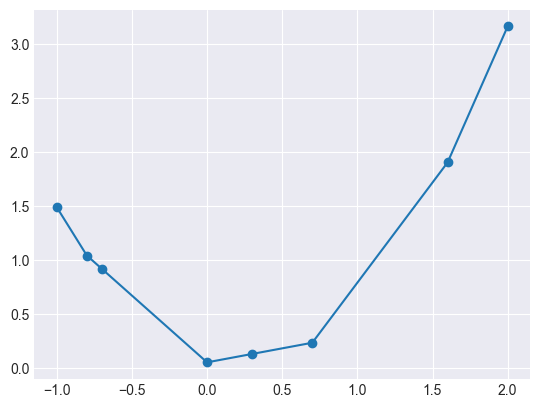

In [2]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
x = np.array([-1, -0.8, 0, 0.7, 1.6, 2])
y = (x-0.22)**2

f = interp1d(x, y, kind='linear')

xnew = np.array([0.3, -0.7])

plt.style.use('seaborn-darkgrid')
xnew = np.hstack((x, xnew))
ynew = f(xnew)
idx = xnew.argsort()
xnew = np.sort(xnew)
ynew = ynew[idx]
print(xnew)
print(ynew
      )
plt.plot(xnew, ynew, marker='o')

plt.show()

In [3]:
a = np.array(['1', '1', '1', '2', '2', '3'])
b = np.array([

    
])
a_ = np.unique(a)
idx = [np.where(k == a )[0][0] for k in a_]
print(idx)

[0, 3, 5]


[-8 -3  0  4 10 -6 -3  2  7]
[-8 -6 -3  0  2  4  7 10]


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_6676\2794687554.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


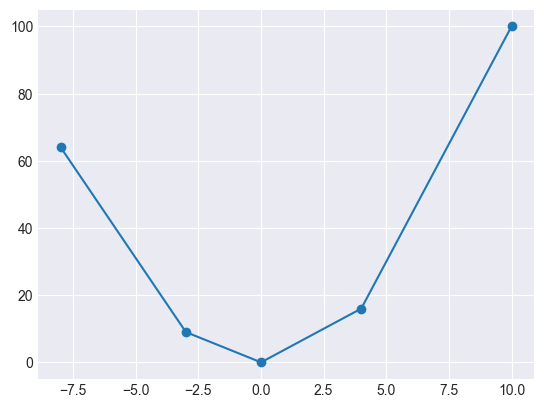

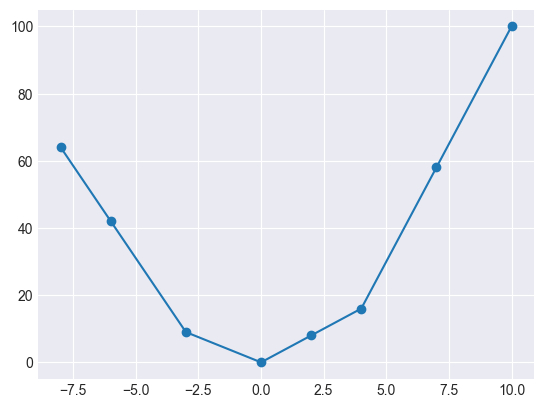

In [2]:
from function import interpolate_IncreasePoints
import matplotlib.pyplot as plt
import numpy as np


x = np.array([-8, -3, 0, 4, 10])
y = x**2
points = np.array([-6, -3, 2, 7])

a = np.hstack((x, points))
print(a)
print(np.unique(a))
u, v = interpolate_IncreasePoints(x=x, y=y, points=points)

plt.style.use('seaborn-darkgrid')

plt.plot(x, y, marker = 'o')
plt.show()
plt.plot(u, v, marker = 'o')
plt.show()

[-10  -8  -6  -4  -2   0   2   4   6   8  10]
[100  64  36  16   4   0   4  16  36  64 100]


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_17228\1445207448.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


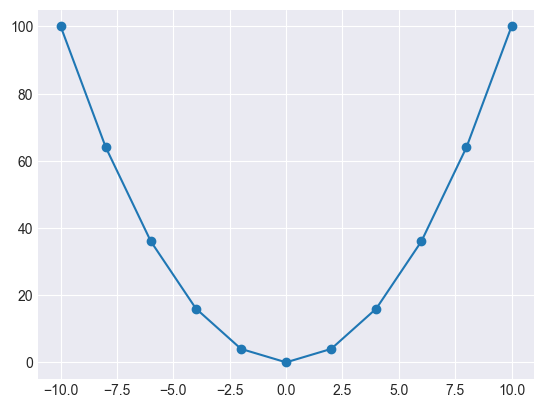

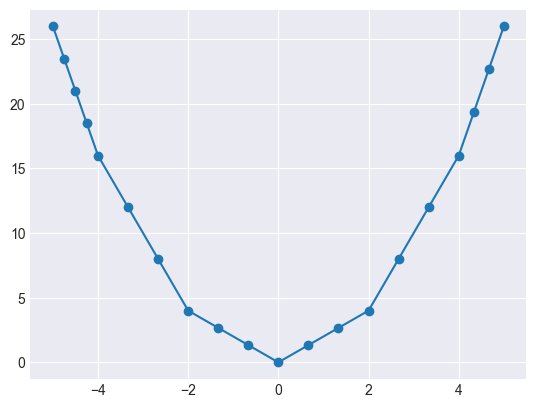

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from function import interpolate_range

x = np.arange(-10, 11, 2)
print(x)
y = x**2
print(y)
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, marker='o')
plt.show()

bond = np.array([-5, 5])

x_new, ynew = interpolate_range(x, y, bond, 20)
plt.plot(x_new, ynew, marker='o')
plt.show()


In [7]:
import numpy as np
from function import Bondfilter
a = np.hstack((np.arange(-2, 3, 1), np.arange(10, 15, 1)))

b = np.hstack((np.ones(5)*1.3, np.ones(5)*10.8))

A = np.vstack((a, b)).T

b_min = b-1
b_max = b+1
print(b_min)
print(b_max)
print(a)
x, condition = Bondfilter(a, b_min, b_max)

print(x)

[0.3 0.3 0.3 0.3 0.3 9.8 9.8 9.8 9.8 9.8]
[ 2.3  2.3  2.3  2.3  2.3 11.8 11.8 11.8 11.8 11.8]
[-2 -1  0  1  2 10 11 12 13 14]
[ 1  2 10 11]


[-5.         -4.5        -4.         -3.         -2.         -1.33333333
 -0.66666667  0.          0.66666667  1.33333333  2.          3.
  4.          4.5         5.        ]
[26.         21.         16.         10.          4.          2.66666667
  1.33333333  0.          1.33333333  2.66666667  4.         10.
 16.         21.         26.        ]


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2188\2781261840.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


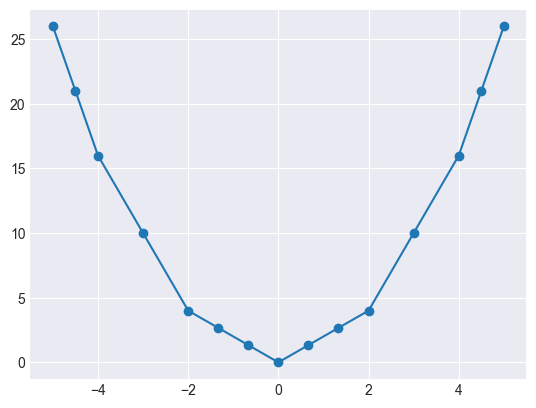

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from function import interpolate_range
x = np.arange(-10, 11, 2)
y = x**2
bond = [-5, 5]
x_new, ynew = interpolate_range(x=x, y=y, points=bond, points_num=15)
print(x_new)
print(ynew)
plt.style.use('seaborn-darkgrid')
plt.plot(x_new, ynew, marker='o')
plt.show()